# Image Preprocessing

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import image
import seaborn as sns

from PIL import Image

<class 'numpy.ndarray'> (427, 640, 3)


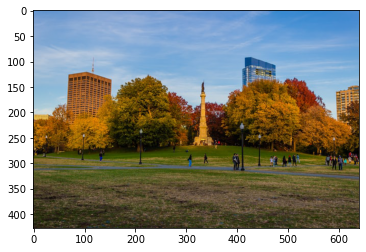

In [2]:
img = image.imread('dataset/park.jpg')

print(type(img), img.shape)

plt.imshow(img)

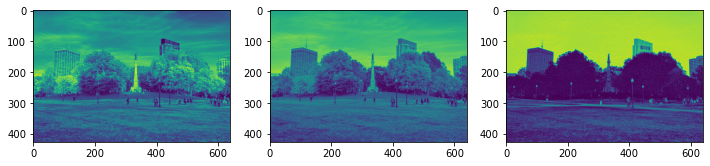

In [3]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(img[:,:,0])

plt.subplot(1, 3, 2)
plt.imshow(img[:,:,1])

plt.subplot(1, 3, 3)
plt.imshow(img[:,:,2])

<class 'PIL.JpegImagePlugin.JpegImageFile'>


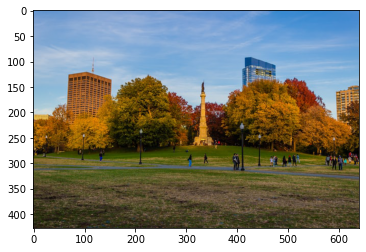

In [4]:
img = Image.open('dataset/park.jpg')

print(type(img))

plt.imshow(img)

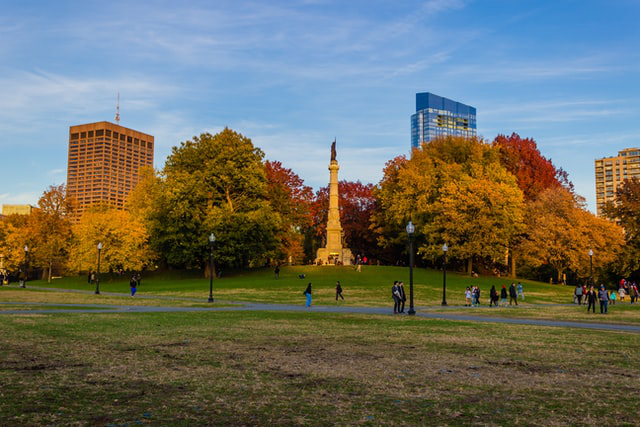

In [5]:
img

In [6]:
print(img.format)

print(img.mode)

print(img.size)

print(img.palette)

JPEG
RGB
(640, 427)
None


### Images as arrays of data

What is an image? So far, PIL has handled loading images and displaying them. However, if we're going to use images as data, we need to understand what that data looks like.  
Most image formats have three color "channels": red, green, and blue (some images also have a fourth channel called "alpha" that controls transparency). For each pixel in an image, there is a value for every channel.

The way this is represented as data is as a three-dimensional matrix. The width of the matrix is the width of the image, the height of the matrix is the height of the image, and the depth of the matrix is the number of channels. So, as we saw, the height and width of our image are both 100 pixels. This means that the underlying data is a matrix with the dimensions `100x100x3`.

In [7]:
# Turn our image object into a NumPy array
img_arr = np.array(img)

print(type(img_arr), img_arr.shape)

<class 'numpy.ndarray'> (427, 640, 3)


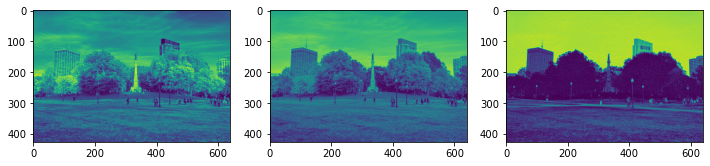

In [8]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(img_arr[:,:,0])

plt.subplot(1, 3, 2)
plt.imshow(img_arr[:,:,1])

plt.subplot(1, 3, 3)
plt.imshow(img_arr[:,:,2])

In [9]:
img.split()

(<PIL.Image.Image image mode=L size=640x427 at 0x1B343BDAB20>,
 <PIL.Image.Image image mode=L size=640x427 at 0x1B343BDAF40>,
 <PIL.Image.Image image mode=L size=640x427 at 0x1B343BDAEB0>)

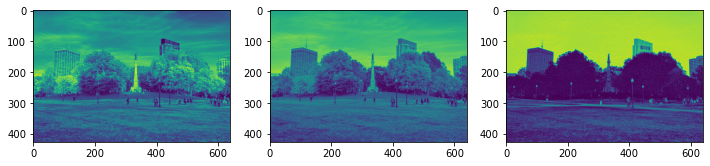

In [10]:
red, green, blue = img.split()

plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1)
plt.imshow(red)

plt.subplot(1, 3, 2)
plt.imshow(green)

plt.subplot(1, 3, 3)
plt.imshow(blue)

### Explore the color channels

Color channels can help provide more information about an image. A picture of the ocean will be more blue, whereas a picture of a field will be more green. This kind of information can be useful when building models or examining the differences between images.  

We'll look at the kernel density estimate for each of the color channels on the same plot so that we can understand how they differ.  
When we make this plot, we'll see that a shape that appears further to the right means more of that color, whereas further to the left means less of that color.

In [11]:
channels = ['r', 'g', 'b']

enumerate(channels)

for i in enumerate(channels):
    print(i)

(0, 'r')
(1, 'g')
(2, 'b')


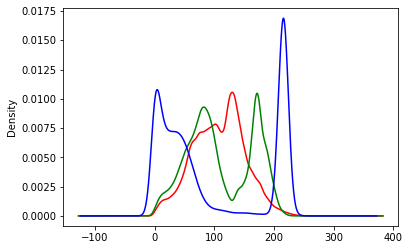

In [12]:
def plot_kde(channel, color):
    """ Plots a kernel density estimate for the given data.
        
        `channel` must be a 2d array
        `color` must be a color string, e.g. 'r', 'g', or 'b'
    """
    data = channel.flatten()
    return pd.Series(data).plot(kind='density', c=color)

# create the list of channels
channels = ['r', 'g', 'b']
    
def plot_rgb(image_data):
    # use enumerate to loop over colors and indexes
    for ix, color in enumerate(channels):
        plot_kde(image_data[:, :, ix], color)

    plt.show()
    
plot_rgb(img_arr)

### Image manipulation with PIL

Pillow has a number of common image manipulation tasks built into the library. For example, one may want to resize an image so that the file size is smaller. Or, perhaps, convert an image to black-and-white instead of color. Operations that Pillow provides include:

- resizing
- cropping
- rotating
- flipping

Often, these kinds of manipulations are part of the pipeline for turning a small number of images into more images to create training data for machine learning algorithms. This technique is called `data augmentation`, and it is a common technique for image classification.  
We'll try a couple of these operations and look at the results.

In [13]:
new_img = img.resize((200, 200))
new_img.save('dataset/image_200.jpg')

print(img.size) # Output: (640, 427)
print(new_img.size) # Output: (400, 400)

(640, 427)
(200, 200)


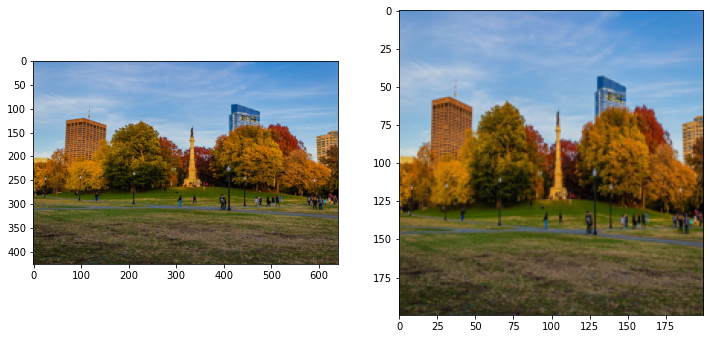

In [14]:
plt.figure(figsize=(12, 12))

plt.subplot(1, 2, 1)
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.imshow(new_img)

(200, 133)


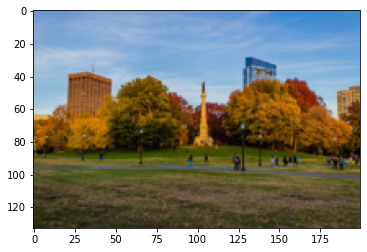

In [15]:
# thumbnail take cares of the aspect ratio

img.thumbnail((200, 200))
img.save('dataset/image_thumbnail.jpg')

print(img.size) # Output: (400, 267)

plt.imshow(img)

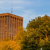

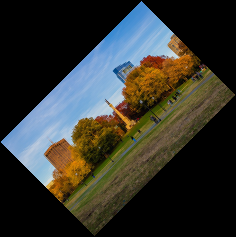

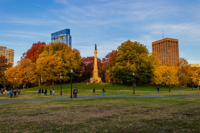

In [16]:
# Crop the image to 25, 25, 75, 75
img_cropped = img.crop((25, 25, 75, 75))
display(img_cropped)

# rotate the image by 45 degrees
img_rotated = img.rotate(45, expand=25)
display(img_rotated)

# flip the image left to right
img_flipped = img.transpose(Image.FLIP_LEFT_RIGHT)
display(img_flipped)

### Flatten multichannel image

In [26]:
img = Image.open('dataset/park.jpg')

img_arr = np.array(img)

print(type(img_arr), img_arr.shape)

<class 'numpy.ndarray'> (427, 640, 3)


In [27]:
img_arr

array([[[103, 152, 210],
        [103, 152, 210],
        [103, 152, 210],
        ...,
        [ 83, 142, 212],
        [ 83, 142, 212],
        [ 83, 142, 212]],

       [[103, 152, 210],
        [103, 152, 210],
        [103, 152, 210],
        ...,
        [ 82, 142, 212],
        [ 82, 142, 212],
        [ 82, 142, 212]],

       [[105, 151, 210],
        [105, 151, 210],
        [105, 151, 210],
        ...,
        [ 81, 141, 211],
        [ 81, 141, 211],
        [ 81, 141, 211]],

       ...,

       [[ 49,  40,  23],
        [ 53,  46,  30],
        [ 42,  34,  21],
        ...,
        [117, 101,  76],
        [110,  93,  67],
        [100,  83,  57]],

       [[ 50,  43,  25],
        [ 46,  39,  23],
        [ 26,  18,   7],
        ...,
        [102,  88,  62],
        [ 89,  75,  49],
        [ 80,  64,  39]],

       [[ 50,  45,  25],
        [ 46,  40,  24],
        [ 31,  23,  12],
        ...,
        [ 86,  76,  49],
        [ 71,  59,  33],
        [ 65,  51,  25]]

**The images output array looks like this (427, 640, 3)**

In [30]:
img_arr.ravel()

array([103, 152, 210, ...,  65,  51,  25], dtype=uint8)

In [31]:
flat_img = img_arr.ravel()

print(flat_img.shape)

(819840,)
